In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import seaborn as sns

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [5]:
coffe_index = pd.read_csv("data/merged_data_cleaned.csv", index_col = 0)

In [6]:
coffe_index.head(5)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [7]:
coffe_index.shape

(1339, 43)

In [8]:
print("Observations:", coffe_index.shape[0])
print("Features:", coffe_index.shape[1])
print("Columns:", coffe_index.columns.tolist())

Observations: 1339
Features: 43
Columns: ['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [10]:
coffe_index.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

#### Observations 
In a dataset observation is a single row of data and represent one individual point of record. In out dataset observations are equal to the number rows - 1339. 
#### Features
The features are specific measurable properties or characteristics of the data and they are equal to the columns. In the our dataset we have 43 features.
##### Numerical Features
These are features that represent quantities.Usually,they are numbers with which we can do mathematical operations.For example in our dataset those are Lot.Number, ICO.Number, Alttitude, Number.of.Bags, Bag.Weight Category.Two.Defects, Grading.Date, Aroma, Flavor, Aftertaste,Acidity, Body, Balance,	Uniformity,	Clean.Cup, Sweetness, Cupper.Points, Total.Cup.Points, Moisture, Category.One.Defects, Quakers,
altitude_low_meters, altitude_high_meters, altitude_mean_meters
##### Categorical Features
These are features that represent categories or groups. They can be nomial or ordinal. In our dataset such features are Species, Owner, Country.Of.Origin, Farm.Name, Mill, Company, Region, Producer, In.Country.Partner, Harvest.Year, Owner 1, Variety, Processing.Method, Color, Category.Two.Defects, 	Expiration,	Certification.Body,	Certification.Address, Certification.Contact, unit_of_measurement   

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [13]:
coffe_index.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [14]:
# I will use a function to convert the column names to lower case and snake_case

coffe_index = coffe_index.rename(columns = lambda col: col.lower().replace(".", "_"))

In [15]:
coffe_index.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [17]:
coffe_index.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [18]:
coffe_index.bag_weight.dtype

dtype('O')

In [19]:
coffe_index.bag_weight.value_counts()

bag_weight
1 kg        331
60 kg       256
69 kg       200
70 kg       156
2 kg        122
100 lbs      59
30 kg        29
5 lbs        23
6            19
20 kg        14
50 kg        14
10 kg        11
59 kg        10
1 lbs         8
1             7
3 lbs         7
5 kg          7
2 lbs         5
4 lbs         4
80 kg         4
18975 kg      4
0 lbs         3
46 kg         3
29 kg         2
9000 kg       2
25 kg         2
66 kg         2
35 kg         2
12000 kg      2
40 kg         2
6 kg          2
19200 kg      2
15 kg         2
13800 kg      1
100 kg        1
55 lbs        1
4 kg          1
67 kg         1
350 kg        1
3 kg          1
8 kg          1
80 lbs        1
24 kg         1
1500 kg       1
2 kg,lbs      1
0 kg          1
660 kg        1
1218 kg       1
2             1
18 kg         1
150 lbs       1
18000 kg      1
1 kg,lbs      1
132 lbs       1
34 kg         1
130 lbs       1
Name: count, dtype: int64

#### Problems found with bag_weight column
Looking at the value_counts(), the dtypes and the column data we can suggest that there are the following problems 
with the bag_weight column:
- different weigth units (kg and lbs)
- numbers and units are no separated
- entries without units
- ambiguous entries - 1 kg, lbs
- problems with whitespaces and casing
- data type is object

In respect to the different weight units my analysis shows that we have 1198 entries in which the weight is shown in kg, 114 observations in which the weight is shown in lbs, 27 with missing units and 2 with mix entries. The kilogram is used as a measure in 88.15% of the observations.      

To solve above issues with the bag_weight columns I will perform a set of operations starting with the
normalization of all the data in the column.

In [22]:
# Normalize casting and spaces 

coffe_index["bag_weight"] = coffe_index["bag_weight"].str.lower().str.replace(",", " ").str.strip()

In [23]:
coffe_index["bag_weight"]

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [24]:
# Extract weight
# We want to see what is the clear weight of each observation.
# To do this we will extract the weight as a float.
# The extracted weight we will keep in a new feature column - bag_weight_num.

coffe_index["bag_weight_num"] = coffe_index["bag_weight"].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [25]:
coffe_index["bag_weight_num"]

0       60.0
1       60.0
2        1.0
3       60.0
4       60.0
        ... 
1334     2.0
1335     2.0
1336     1.0
1337     5.0
1338     5.0
Name: bag_weight_num, Length: 1339, dtype: float64

In [26]:
# 3.Extract the unit

# As a next step we will extract the unit from the bag_weight column and store it in a new column bag_weight_unit
# The mix entries will be converted to kg, because the first entry in both observations is kg. The lbs entries 
# aftert the kg, probabbly is a techincal error. 

coffe_index["bag_weight_unit"] = coffe_index["bag_weight"].str.extract(r'\d+\.?\d*\s*([a-z]*)')[0]

In [27]:
coffe_index["bag_weight_unit"].value_counts()

bag_weight_unit
kg     1198
lbs     114
         27
Name: count, dtype: int64

In [28]:
# Analyze the observations without entries
# We will try to find out from which country they are and check what is the units used in that country
# Replace the missing units with the units used in that perticular country 

coffe_index[~coffe_index['bag_weight_unit'].isin(['kg', 'lbs'])]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00,1.0,
13,Arabica,grounds for health admin,United States (Hawaii),arianna farms,NaN,NaN,NaN,NaN,2000 ft,kona,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.60,609.60,609.60,1.0,
17,Arabica,ethiopia commodity exchange,Ethiopia,NaN,NaN,NaN,010/0056,NaN,NaN,yirgacheffe,...,"June 16th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN,6.0,
26,Arabica,ethiopia commodity exchange,Ethiopia,NaN,NaN,NaN,010/0056/Sidamo,NaN,NaN,sidamo,...,"June 16th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN,6.0,
30,Arabica,nora zeas,Nicaragua,NaN,NaN,beneficio atlantic condega,790-0013,NaN,NaN,NaN,...,"May 18th, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN,6.0,
38,Arabica,ethiopia commodity exchange,Ethiopia,"phone number | 0911-51-08-01, email | at",NaN,NaN,010/0170,NaN,NaN,yirgacheffe,...,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN,6.0,
50,Arabica,ethiopia commodity exchange,Ethiopia,contact | sidacoop@ethionet.net,NaN,coffee processing and warehouse enterpri,010/0145,NaN,1500-2000 m,sidamo,...,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1500.00,2000.00,1750.00,6.0,
51,Arabica,grounds for health admin,United States (Hawaii),hula daddy kona coffee,NaN,NaN,NaN,NaN,1400ft,kona,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,426.72,426.72,426.72,2.0,
82,Arabica,ethiopia commodity exchange,Ethiopia,NaN,NaN,NaN,010/0001/0022,NaN,NaN,yirgacheffe,...,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN,6.0,
94,Arabica,ethiopia commodity exchange,Ethiopia,NaN,NaN,NaN,010/0058/Sidamo,NaN,NaN,sidamo,...,"June 17th, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,NaN,NaN,NaN,6.0,


In [29]:
coffe_index[coffe_index["country_of_origin"] == "United States (Hawaii)"].head(5)

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit
13,Arabica,grounds for health admin,United States (Hawaii),arianna farms,NaN,NaN,NaN,NaN,2000 ft,kona,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.60,609.60,609.60,1.0,
36,Arabica,kona pacific farmers cooperative,United States (Hawaii),NaN,NaN,NaN,220452,kona pacific farmers cooperative,NaN,kona,...,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN,100.0,lbs
37,Arabica,kona pacific farmers cooperative,United States (Hawaii),kona pacific farmers cooperative,NaN,NaN,HDOA 210128 Kona Fancy,NaN,NaN,kona,...,"January 28th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN,100.0,lbs
51,Arabica,grounds for health admin,United States (Hawaii),hula daddy kona coffee,NaN,NaN,NaN,NaN,1400ft,kona,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,426.72,426.72,426.72,2.0,
64,Arabica,kona pacific farmers cooperative,United States (Hawaii),NaN,NaN,NaN,220451,kona pacific farmers cooperative,NaN,kona,...,"April 6th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN,100.0,lbs


In [30]:
coffe_index[coffe_index["country_of_origin"] == "Mexico"].head(5)

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit
22,Arabica,roberto licona franco,Mexico,la herradura,NaN,la herradura,0,NaN,1320,xalapa,...,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0,1.0,kg
99,Arabica,"el equimite, cafetal biodinámico",Mexico,various,Mezcla Veracruz 01,"cafetal el equimite, rancho agroecológico",NaN,"cafetal el equimite, rancho agroecológico, s.p...",1300,veracruz,...,"September 21st, 2017",Centro Agroecológico del Café A.C.,3b8dfdd621590b424ff64e0b76df7d6a92e1c628,d470dc009281519e30da6ead1c649fcd7670f386,m,1300.0,1300.0,1300.0,30.0,kg
103,Arabica,young kim,Mexico,kassandra,NaN,NaN,016-2484-04,NaN,1400 masl,mexico,...,"April 5th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0,1.0,kg
111,Arabica,artemio zapata tejeda,Mexico,el suspiro,NaN,pacho viejo,1104385872,NaN,1200,coatepec,...,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1200.0,1200.0,1200.0,1.0,kg
140,Arabica,organizaciones de productores de cafe colimense,Mexico,"el nogal, la higuera, los laureles",NaN,cafetaleros de el remudadero s.p.r. de r.l.,"703816889, 108282,703816891",organizaciones de productores de cafe colimens...,1200,el remudadero,...,"July 2nd, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1200.0,1200.0,1200.0,1.0,kg


In [31]:
coffe_index[coffe_index["country_of_origin"] == "Guatemala"].head(5)

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.000,1700.000,1.0,
52,Arabica,juan luis alvarado romero,Guatemala,la esperanza y anexos,11/23/0252,beneficio ixchel,11/23/0252,"unex guatemala, s.a.",NaN,nuevo oriente,...,"May 16th, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,NaN,NaN,NaN,69.0,kg
57,Arabica,juan luis alvarado romero,Guatemala,valparaiso,NaN,beneficio valparaiso,11/1886/03,sertrasa,5000,acatenango,...,"July 3rd, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1524.00,1524.000,1524.000,1.0,kg
58,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11-853-155,unicafe,4650,nuevo oriente,...,"June 5th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.320,1417.320,1.0,kg
69,Arabica,juan luis alvarado romero,Guatemala,asoperc,NaN,beneficio exportacafe agua santa,11-52-492,exportcafe,5600-5760 metros,huehuetenango,...,"February 26th, 2014",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1706.88,1755.648,1731.264,69.0,kg


In [32]:
coffe_index[coffe_index["country_of_origin"] == "Nicaragua"]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit
30,Arabica,nora zeas,Nicaragua,NaN,NaN,beneficio atlantic condega,790-0013,NaN,NaN,NaN,...,"May 18th, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN,6.0,
124,Arabica,grounds for health admin,Nicaragua,santa martha,NaN,beneficio atlantic sebaco,1-053-0222,NaN,800-1050m,jinotega,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,800.0,1050.0,925.0,6.0,
217,Arabica,cooperativa el gorrion r.l,Nicaragua,las nubes,NaN,beneficio humedo,017/176/165,cooperativa el gorrion r.l,de 900 a 1100 msnm,jinotega,...,"August 2nd, 2016",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,900.0,1100.0,1000.0,2.0,kg
317,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,santa matilde,606118 / K1730101,dry mill,017/001/1412,"comercial internacional exportadora, s.a.",1250,jinotega,...,"May 11th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1250.0,1250.0,1250.0,69.0,kg
531,Arabica,grounds for health admin,Nicaragua,santa rosa,NaN,beneficio atlantic sebaco,1-053-0222,NaN,NaN,matagalpa,...,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN,6.0,
758,Arabica,"bencafe, s. a.",Nicaragua,el brigadum - la coronela,017/105/16042,dry mill,16042,"beneficiadora norteña de cafe, s. a. (bencafe)",1000,jinotega,...,"March 15th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1000.0,1000.0,1000.0,69.0,kg
822,Arabica,chris finch,Nicaragua,NaN,NaN,NaN,17/176/0125B,volcafe specialty coffee,NaN,NaN,...,"July 29th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN,5.0,lbs
875,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,santa matilde,345725 / K1620088,dry mill,017/001/534,"comercial internacional exportadora, s.a.",NaN,jinotega,...,"March 11th, 2017",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,NaN,NaN,NaN,69.0,kg
911,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211 / 017-053-0212,beneficio atlantic condega,017-053-0211 / 017-053-0212,exportadora atlantic s.a,1100,jalapa,...,"June 20th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.0,1100.0,1100.0,69.0,kg
964,Arabica,"comercial internacional exportadora, s.a.",Nicaragua,cafetales santa matilde,NaN,san carlos,017/001/1214,"comercial internacional exportadora, s.a.",1100,jinotega,...,"July 5th, 2016",Asociación de Cafés Especiales de Nicaragua,fc561dd3c2eee024b032933e0a97b4aede0dc206,f79a8d4dee92a80ff14025f03ea34fa316b2132f,m,1100.0,1100.0,1100.0,69.0,kg


In [33]:
coffe_index[coffe_index["country_of_origin"] == "Ethiopia"].head(5)

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.0,kg
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.0,kg
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0,60.0,kg
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,60.0,kg
7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromia,...,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0,60.0,kg


From all the six countries only United States (Hawaii) is using lbs as a measurable unit. So, we will add lbs 
to the missing entries from United States (Hawaii). In Nicaragua, we have some mix entries but majariyt is 
kg and in that respect we will not change them to lbs.

In [35]:
# List of indexes you want to update
indexes_to_update = [13, 51, 313, 606, 933]

# Set 'lbs' for those rows in the 'bag_weight_unit' column
coffe_index.loc[indexes_to_update, "bag_weight_unit"] = 'lbs'

In [36]:
coffe_index.loc[indexes_to_update, ['bag_weight_num', 'bag_weight_unit']]

,bag_weight_num,bag_weight_unit
13,1.0,lbs
51,2.0,lbs
313,1.0,lbs
606,1.0,lbs
933,1.0,lbs


In [37]:
# 4.Convert the lbs to kg

# Ou analysis shows that 90 % of the units are in kg. Taking this into account and according to the data
# in internet for the measurement of coffe bags, we decide to convert all lb and lbs(they both means pounds)
# to kilograms.

coffe_index["bag_weight_kg"] = np.where(
    coffe_index["bag_weight_unit"].isin(['lb', 'lbs']),
    coffe_index["bag_weight_num"]* 0.453592,
    coffe_index["bag_weight_num"]
)

In [38]:
coffe_index["bag_weight_kg"].value_counts(dropna=False) 

bag_weight_kg
1.000000        335
60.000000       256
69.000000       200
70.000000       156
2.000000        123
45.359200        59
30.000000        29
2.267960         23
6.000000         21
20.000000        14
50.000000        14
0.453592         12
10.000000        11
59.000000        10
1.360776          7
5.000000          7
0.907184          6
18975.000000      4
1.814368          4
80.000000         4
0.000000          4
46.000000         3
29.000000         2
19200.000000      2
12000.000000      2
35.000000         2
66.000000         2
40.000000         2
25.000000         2
15.000000         2
9000.000000       2
8.000000          1
3.000000          1
350.000000        1
24.947560         1
67.000000         1
4.000000          1
24.000000         1
100.000000        1
36.287360         1
660.000000        1
1500.000000       1
13800.000000      1
1218.000000       1
34.000000         1
18.000000         1
68.038800         1
18000.000000      1
59.874144         1
58.966

In [39]:
# Delete the other columns

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [41]:
coffe_index.harvest_year.value_counts(dropna=False)

harvest_year
2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
NaN                          47
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
March 2010                    3
Mayo a Julio                  3
2009-2010                     3
4T/2010                       3
Abril - Julio                 2
January 2011                  2
2011/2012                     2
08/09 crop                    2
TEST                          1
mmm                           1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                  

In [42]:
coffe_index.harvest_year.dtypes

dtype('O')

#### Problems found with harvest_year column
Similat to problem 4, we look at value_counts(), the dtypes and the column data. The analysis shows that we have the following mix of messy data:  
- single years - 2011, 2012
- years ranges - 2016/2017, 2013/2014   
- years with text periods - January 2011
- periods with only text - Abril - Julio 
- data with quarter indicators - 4t/2010. 1T/2011 
- invalid or unknown data - TEST, mmm 

Our goal is to have usable numerical format consisting of single representative year.
To obtain this we will make the following assumptions:
1. We have to make a desicion which year to take into considerations from the mix year ranges. It is realy hard to decide but taking into account that the best coffee is picked in hte middle
(source: https://coffeehunter.com/coffee-seasonality/; https://driftaway.coffee/when-is-coffee-harvested/) and by the end of the harvest season we will assume that the harvest year is the second year from years ranges.
2. For the data with quarter indicators 4t/2010. 1T/2011 ( in spanish and portugeass T indicates "Trimestre" - Quater) we will leave just the year.
3. For periods only with text - we will replacethem with Unknown      


In [45]:
# Develop a function to clean the data 

def extract_clean_year(value):
    if pd.isna(value):
        return "Unknown"
    value = str(value).lower().strip()

   # Fix malformed: extract last 4 digits if there's a T followed by 4+ digits
    malformed_match = re.match(r'.*t.*(\d{4})$', value)
    if malformed_match:
        return malformed_match.group(1)

    # Standard YYYY
    match = re.match(r'^\d{4}$', value)
    if match:
        return value

    # YYYY/YYYY or YYYY-YYYY or YYYY / YYYY
    match = re.search(r'(\d{4})\s*[/\-]\s*(\d{4})', value)
    if match:
        return match.group(2)

    # YY/YY like 08/09 crop
    match = re.search(r'(\d{2})/(\d{2})', value)
    if match:
        return f"20{match.group(2)}"

    # Fallback: any 4-digit year
    match = re.search(r'(\d{4})', value)
    if match:
        return match.group(1)

    return "Unknown" 

coffe_index["harvest_year_clean"]= coffe_index["harvest_year"].apply(extract_clean_year)

In [46]:
coffe_index["harvest_year_clean"].value_counts(dropna=False)

harvest_year_clean
2012       356
2014       262
2013       181
2016       152
2015       148
2017        77
Unknown     61
2011        40
2010        37
2018        20
2009         4
2020         1
Name: count, dtype: int64

In [47]:
coffe_index.iloc[948]

species                                                   Arabica
owner                              exportadora de cafe condor s.a
country_of_origin                                        Colombia
farm_name                                                     NaN
lot_number                                                    NaN
mill                        trilladora bonanza - armenia quindioa
ico_number                                              3-68-0130
company                                                       NaN
altitude                                                1880 msnm
region                                                      cauca
producer                                                      NaN
number_of_bags                                                250
bag_weight                                                  70 kg
in_country_partner                                       Almacafé
harvest_year                                              4T72010
grading_da

In [48]:
coffe_index.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'bag_weight_num', 'bag_weight_unit', 'bag_weight_kg',
       'harvest_year_clean'],
      dtype='object')

In [49]:
coffe_index.expiration.value_counts()

expiration
July 11th, 2013        25
December 26th, 2014    25
June 6th, 2013         19
August 30th, 2013      18
July 26th, 2013        15
                       ..
March 8th, 2012         1
May 11th, 2012          1
December 1st, 2012      1
April 27th, 2013        1
December 23rd, 2015     1
Name: count, Length: 566, dtype: int64

In [50]:
coffe_index.expiration.value_counts(dropna=False)

expiration
July 11th, 2013        25
December 26th, 2014    25
June 6th, 2013         19
August 30th, 2013      18
July 26th, 2013        15
                       ..
March 8th, 2012         1
May 11th, 2012          1
December 1st, 2012      1
April 27th, 2013        1
December 23rd, 2015     1
Name: count, Length: 566, dtype: int64

In [51]:
# Remove ordinal suffixes using regex
def clean_date(date_str):
    if pd.isna(date_str):
        return None
    # Strip whitespace and newlines
    date_str = date_str.strip()
    # Remove 'st', 'nd', 'rd', 'th' from day part
    return re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', date_str)

# Apply the cleaning function
coffe_index["expiration_clean"] = coffe_index["expiration"].apply(clean_date)

# Convert the cleaned expiration column to datetime
coffe_index["expiration_clean"] = pd.to_datetime(coffe_index["expiration_clean"], errors="coerce")

# Apply the cleaning function
coffe_index["granding_date_clean"] = coffe_index["grading_date"].apply(clean_date)

# Convert the cleaned expiration column to datetime
coffe_index["granding_date_clean"] = pd.to_datetime(coffe_index["granding_date_clean"], errors="coerce")

In [52]:
coffe_index["expiration_clean"].isna().sum()

0

In [53]:
coffe_index.grading_date.value_counts(dropna=False)

grading_date
July 11th, 2012        25
December 26th, 2013    24
June 6th, 2012         19
August 30th, 2012      18
July 26th, 2012        15
                       ..
March 9th, 2011         1
May 12th, 2011          1
December 2nd, 2011      1
April 27th, 2012        1
December 23rd, 2014     1
Name: count, Length: 567, dtype: int64

In [54]:
coffe_index["granding_date_clean"].isna().sum()

0

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [56]:
coffe_index.country_of_origin.value_counts()

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

In [57]:
coffe_index.country_of_origin.value_counts(dropna=False)

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

In [58]:
coffe_index.country_of_origin.isna().value_counts()

country_of_origin
False    1338
True        1
Name: count, dtype: int64

In [59]:
unknown_countries = coffe_index[coffe_index["country_of_origin"].isna()]

In [60]:
unknown_countries

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit,bag_weight_kg,harvest_year_clean,expiration_clean,granding_date_clean
1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,NaN,...,m,NaN,NaN,NaN,70.0,kg,70.0,Unknown,2012-02-29,2011-03-01


We know who is the owner of that coffe and we will try to find the country of origin via the owner

In [62]:
coffe_index[coffe_index["owner"] == "racafe & cia s.c.a"]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,bag_weight_num,bag_weight_unit,bag_weight_kg,harvest_year_clean,expiration_clean,granding_date_clean
97,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1829,bachue,3-37-1829,racafe & cia s.c.a,NaN,huila,...,m,NaN,NaN,NaN,70.0,kg,70.0,2016,2018-02-15,2017-02-15
106,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-0277,bachue,3-37-0277,racafe & cia s.c.a,NaN,huila,...,m,NaN,NaN,NaN,70.0,kg,70.0,2016,2017-11-25,2016-11-25
107,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-4824,racafe & cia s.c.a,de 1600 a 1950 msnm,huila,...,m,1600.0,1950.0,1775.0,70.0,kg,70.0,2015,2016-10-25,2015-10-26
110,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0416,racafe & cia s.c.a,de 1600 a 1950 msnm,huila,...,m,1600.0,1950.0,1775.0,70.0,kg,70.0,2012,2013-12-11,2012-12-11
145,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1724,bucaramanga,3-37-1724,racafe & cia s.c.a,1500,santander,...,m,1500.0,1500.0,1500.0,70.0,kg,70.0,2016,2018-01-10,2017-01-10
146,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1291,bachue,3-37-1291,racafe & cia s.c.a,NaN,huila,...,m,NaN,NaN,NaN,70.0,kg,70.0,2016,2017-12-28,2016-12-28
151,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0930,racafe & cia s.c.a,1600 a 1900 msnm,huila,...,m,1600.0,1900.0,1750.0,70.0,kg,70.0,2013,2014-12-06,2013-12-06
174,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-2940,racafe & cia s.c.a,de 1600 a 1950 msnm,huila,...,m,1600.0,1950.0,1775.0,70.0,kg,70.0,2014,2015-07-09,2014-07-09
183,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1704,bogota - bachue,3-37-1704,racafe & cia s.c.a,NaN,la plata,...,m,NaN,NaN,NaN,70.0,kg,70.0,2016,2017-02-15,2016-02-16
197,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0637,racafe & cia s.c.a,de 1600 a 1950 msnm,huila,...,m,1600.0,1950.0,1775.0,70.0,kg,70.0,2015,2016-11-18,2015-11-19


The country of the origin of the owner is Columbia. If we look at the ico_number there is also match. 

In [64]:
# We will replace the NaN with Columbia


### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [66]:
coffe_index.owner.value_counts()

owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 315, dtype: int64

In [67]:
coffe_index.owner.info()

<class 'pandas.core.series.Series'>
Index: 1339 entries, 0 to 1338
Series name: owner
Non-Null Count  Dtype 
--------------  ----- 
1332 non-null   object
dtypes: object(1)
memory usage: 53.2+ KB


In [68]:
coffe_index.owner_1.value_counts()

owner_1
Juan Luis Alvarado Romero           155
Racafe & Cia S.C.A                   60
Exportadora de Cafe Condor S.A       54
Kona Pacific Farmers Cooperative     52
Ipanema Coffees                      50
                                   ... 
ALVARO QUIROS PEREZ                   1
OLIVIA HERNANDEZ VIRVES               1
FINCA LAS NIEVES                      1
Pedro Santos e Silva                  1
James Moore                           1
Name: count, Length: 319, dtype: int64

In [69]:
# Compare the two columns 
# First we will make the text in the two columns lowercase and strip whitespace for comparision
coffe_index["owner_clean"]= coffe_index["owner"].str.lower().str.strip()
coffe_index["owner_1_clean"]= coffe_index["owner_1"].str.lower().str.strip()

In [70]:
coffe_index.owner_clean.value_counts() 

owner_clean
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 315, dtype: int64

In [71]:
coffe_index.owner_1_clean.value_counts()

owner_1_clean
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
romulo bello flores                   1
rachel peterson                       1
josé luis rojas yeo                   1
nitin coffee estate                   1
james moore                           1
Name: count, Length: 317, dtype: int64

In [72]:
# Compare the clean columns
coffe_index["compare"] = coffe_index["owner_clean"] == coffe_index["owner_1_clean"]

In [73]:
# See in how many values differ
coffe_index["compare"].value_counts()

compare
True     1328
False      11
Name: count, dtype: int64

In [74]:
# List the rows which differ
differences = coffe_index[coffe_index["compare"] == False][["owner_clean", "owner_1_clean"]]

In [75]:
differences

,owner_clean,owner_1_clean
219,"ceca, s.a.","ceca,s.a."
364,NaN,NaN
392,federacion nacional de cafeteros,federación nacional de cafeteros
459,NaN,NaN
602,NaN,NaN
734,klem organics,klemorganics
848,NaN,NaN
882,NaN,NaN
961,klem organics,klemorganics
975,NaN,NaN


Taking into account that the anasyss shows differences between the two columns are 
related to small ... we can remove column Owner   

In [77]:
owner_set = set(coffe_index['owner_clean'].dropna().unique())
owner1_set = set(coffe_index['owner_1_clean'].dropna().unique())

only_in_owner = owner_set - owner1_set
only_in_owner1 = owner1_set - owner_set

In [78]:
only_in_owner

{'klem organics'}

In [79]:
only_in_owner1

{'ceca,s.a.', 'federación nacional de cafeteros', 'klemorganics'}

In [80]:
coffe_index.producer.value_counts()

producer
La Plata                           30
Ipanema Agrícola SA                22
Doi Tung Development Project       17
VARIOS                             12
Ipanema Agricola                   12
                                   ..
Kucofa farmers group                1
GRUPO MEDINA                        1
COFFEE COMPANY / CAFECOL            1
ORLANDO ORTOZ / HIPOLITO TORRES     1
Cafe Cazengo                        1
Name: count, Length: 692, dtype: int64

To find if there are any link to Producers column, first we will make the text in the column lowercase and strip the white speces  

In [82]:
coffe_index["producer_clean"]= coffe_index["producer"].str.lower().str.strip()

In [83]:
# Compare the two and create a new column called relation
coffe_index["relation"] = coffe_index["producer_clean"] == coffe_index["owner_clean"]

In [84]:
coffe_index.relation.value_counts()

relation
False    1188
True      151
Name: count, dtype: int64

In [85]:
coffe_index[coffe_index["relation"]]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,bag_weight_unit,bag_weight_kg,harvest_year_clean,expiration_clean,granding_date_clean,owner_clean,owner_1_clean,compare,producer_clean,relation
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,kg,60.0,2014,2016-04-03,2015-04-04,metad plc,metad plc,True,metad plc,True
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,kg,60.0,2014,2016-04-03,2015-04-04,metad plc,metad plc,True,metad plc,True
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,kg,60.0,2014,2016-04-03,2015-04-04,metad plc,metad plc,True,metad plc,True
9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,"snnp/kaffa zone,gimbowereda",...,kg,60.0,2014,2016-03-29,2015-03-30,diamond enterprise plc,diamond enterprise plc,True,diamond enterprise plc,True
22,Arabica,roberto licona franco,Mexico,la herradura,NaN,la herradura,0,NaN,1320,xalapa,...,kg,1.0,2012,2013-07-26,2012-07-26,roberto licona franco,roberto licona franco,True,roberto licona franco,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,central,...,kg,60.0,2013,2015-07-14,2014-07-14,ugacof,ugacof,True,ugacof,True
1315,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,kg,60.0,2013,2015-06-26,2014-06-26,katuka development trust ltd,katuka development trust ltd,True,katuka development trust ltd,True
1324,Robusta,kasozi coffee farmers association,Uganda,kasozi coffee farmers,NaN,NaN,0,kasozi coffee farmers association,1367,eastern,...,kg,60.0,2013,2015-07-14,2014-07-14,kasozi coffee farmers association,kasozi coffee farmers association,True,kasozi coffee farmers association,True
1328,Robusta,kawacom uganda ltd,Uganda,bushenyi,NaN,kawacom,0,kawacom uganda ltd,1600,western,...,kg,60.0,2013,2015-06-27,2014-06-27,kawacom uganda ltd,kawacom uganda ltd,True,kawacom uganda ltd,True


The data show that in 151 cases producers and owners are the same and we have clear relation between them. In 1188
they are different.

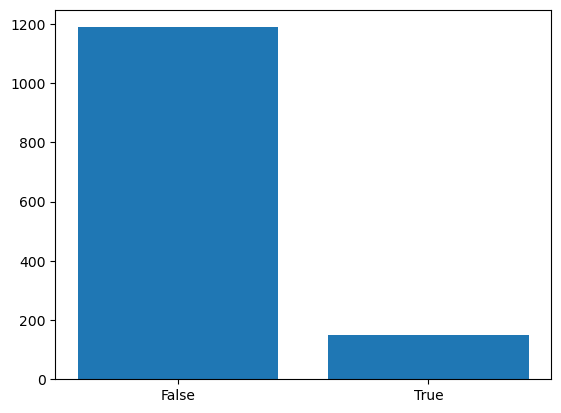

In [87]:
relation_counts = coffe_index["relation"].value_counts()


plt.bar(relation_counts.index.astype(str), relation_counts.values)
plt.show()

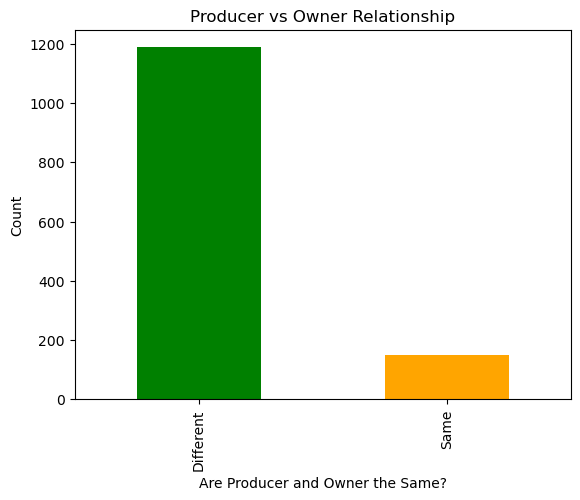

In [88]:
coffe_index["relation"].value_counts().plot(kind="bar", color = ["green", "orange"])
plt.xlabel("Are Producer and Owner the Same?")
plt.ylabel("Count")
plt.title("Producer vs Owner Relationship")
plt.xticks([0, 1], ["Different", "Same"])
plt.show()

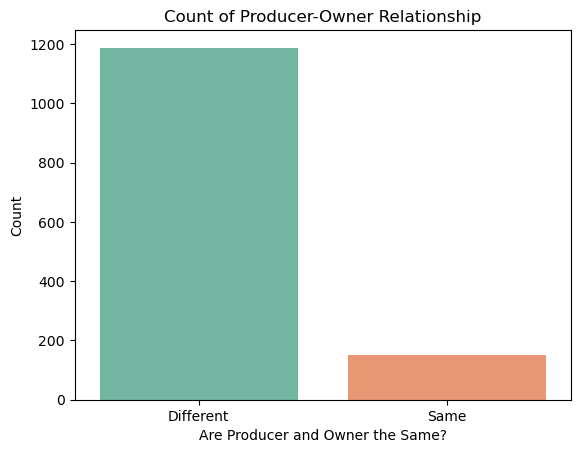

In [89]:
sns.countplot(data=coffe_index, x="relation", hue="relation", palette="Set2", legend=False)
plt.title("Count of Producer-Owner Relationship")
plt.xlabel("Are Producer and Owner the Same?")
plt.ylabel("Count")
plt.xticks([0, 1], ["Different", "Same"])
plt.show()

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [91]:
coffe_index.color.value_counts()

color
Green           870
Bluish-Green    114
Blue-Green       85
Name: count, dtype: int64

In [92]:
# Create a pivot table with countries on the rows and including missing values

coffe_index_color = coffe_index.pivot_table(index = "country_of_origin", columns = "color", values = "species", 
                                            aggfunc = "count")

In [93]:
coffe_index_color.reset_index()

color,country_of_origin,Blue-Green,Bluish-Green,Green
0,Brazil,14.0,12.0,92.0
1,Burundi,NaN,NaN,1.0
2,China,NaN,NaN,16.0
3,Colombia,8.0,8.0,118.0
4,Costa Rica,10.0,9.0,28.0
5,Cote d?Ivoire,NaN,1.0,NaN
6,Ecuador,2.0,1.0,NaN
7,El Salvador,2.0,2.0,9.0
8,Ethiopia,NaN,2.0,15.0
9,Guatemala,2.0,7.0,159.0


In [94]:
coffe_index_color.columns

Index(['Blue-Green', 'Bluish-Green', 'Green'], dtype='object', name='color')

In [95]:
coffe_index.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'bag_weight_num', 'bag_weight_unit', 'bag_weight_kg',
       'harvest_year_clean', 'expiration_clean', 'granding_date_clean',
       'owner_clean', 'owner_1_clean', 'compare', 'producer_clean',
       'relation'],
      dtype='object')

In [96]:
coffe_index.country_of_origin.value_counts()

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

To make teh same with continents we will ecxecute the following steps:
- make the dictionary with every country and corresponding continets
- make a new column in teh Dataframe called continents
- sum the colors by continents
- display

In [98]:
# Make the dictionary
continent_map = {
    "Brazil": "South America",
    "Burundi": "Africa",
    "China": "Asia",
    "Colombia": "South America",
    "Costa Rica": "North America",
    "Cote d?Ivoire": "Africa",
    "Ecuador": "South America",
    "El Salvador": "North America",
    "Ethiopia": "Africa",
    "Guatemala": "North America",
    "Haiti": "North America",
    "Honduras": "North America",
    "India": "Asia",
    "Indonesia": "Asia",
    "Japan": "Asia",
    "Kenya": "Africa",
    "Laos": "Asia",
    "Malawi": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Myanmar": "Asia",
    "Nicaragua": "North America",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Peru": "South America",
    "Philippines": "Asia",
    "Rwanda": "Africa",
    "Taiwan": "Asia",
    "Tanzania, United Republic Of": "Africa",
    "Thailand": "Asia",
    "Uganda": "Africa",
    "United States": "North America",
    "United States (Hawaii)": "North America",
    "United States (Puerto Rico)": "North America",
    "Vietnam": "Asia"
}

In [99]:
# Make the new column - continents
coffe_index["continents"]= coffe_index["country_of_origin"].map(continent_map)

In [100]:
# Create a pivot table with continents in the rows and including missing values

coffe_continets_color = coffe_index.pivot_table(index = "continents", columns = "color", values = "species", 
                                            aggfunc = "count")

In [101]:
coffe_continets_color

color,Blue-Green,Bluish-Green,Green
continents,,,
Africa,6.0,22.0,101.0
Asia,24.0,20.0,106.0
North America,31.0,48.0,447.0
Oceania,NaN,1.0,NaN
South America,24.0,23.0,216.0


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [103]:
coffe_index.aroma.value_counts()

aroma
7.67    179
7.50    165
7.58    152
7.75    125
7.42    122
7.83    103
7.33     98
7.25     78
7.92     59
8.00     48
7.17     45
7.08     28
7.00     23
8.08     20
8.17     20
6.92     14
8.42      9
8.25      9
6.83      9
6.75      7
8.33      7
6.67      3
8.50      3
6.50      2
8.67      2
7.81      2
5.08      1
8.75      1
6.42      1
6.17      1
8.58      1
6.33      1
0.00      1
Name: count, dtype: int64

In [104]:
coffe_index.flavor.value_counts()

flavor
7.50    166
7.58    166
7.67    148
7.75    126
7.42    116
7.33    111
7.83     89
7.25     64
7.17     56
7.92     45
7.08     42
8.00     41
7.00     36
8.17     18
6.83     17
6.92     15
8.08     14
6.75     10
6.50      9
8.25      7
8.33      5
8.42      5
6.58      5
6.67      5
8.50      5
8.67      4
6.33      3
7.88      2
6.17      2
8.58      2
6.42      1
8.83      1
6.08      1
7.81      1
0.00      1
Name: count, dtype: int64

In [105]:
coffe_index.moisture.value_counts()

moisture
0.11    383
0.12    294
0.00    264
0.10    182
0.13     76
0.09     27
0.14     23
0.08     16
0.01     15
0.15      8
0.05      8
0.02      7
0.06      7
0.07      5
0.16      5
0.04      4
0.03      4
0.20      3
0.17      3
0.18      2
0.28      1
0.21      1
0.22      1
Name: count, dtype: int64

--- Aroma ---
Mean: 7.57
Min: 0.0
Max: 8.75
Range: 8.75

--- Flavor ---
Mean: 7.52
Min: 0.0
Max: 8.83
Range: 8.83

--- Aftertaste ---
Mean: 7.40
Min: 0.0
Max: 8.67
Range: 8.67

--- Acidity ---
Mean: 7.54
Min: 0.0
Max: 8.75
Range: 8.75

--- Body ---
Mean: 7.52
Min: 0.0
Max: 8.58
Range: 8.58

--- Balance ---
Mean: 7.52
Min: 0.0
Max: 8.75
Range: 8.75

--- Uniformity ---
Mean: 9.83
Min: 0.0
Max: 10.0
Range: 10.00

--- Clean_cup ---
Mean: 9.84
Min: 0.0
Max: 10.0
Range: 10.00

--- Sweetness ---
Mean: 9.86
Min: 0.0
Max: 10.0
Range: 10.00

--- Cupper_points ---
Mean: 7.50
Min: 0.0
Max: 10.0
Range: 10.00

--- Total_cup_points ---
Mean: 82.09
Min: 0.0
Max: 90.58
Range: 90.58

--- Moisture ---
Mean: 0.09
Min: 0.0
Max: 0.28
Range: 0.28


=== Correlation Matrix ===
                     aroma    flavor  aftertaste   acidity      body  \
aroma             1.000000  0.813259    0.777056  0.723582  0.673006   
flavor            0.813259  1.000000    0.895672  0.816688  0.735720   
aftertaste        0.7

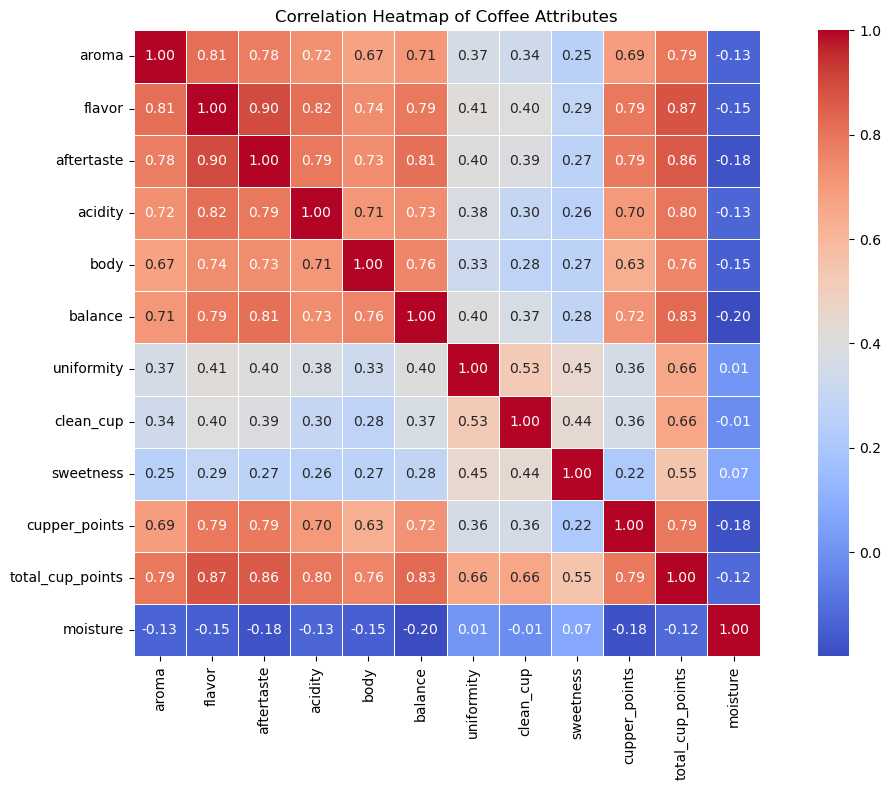

In [106]:
# Select the relevant columns, which we what to explore

columns_to_explore = ["aroma", "flavor", "aftertaste", "acidity","body", "balance", "uniformity",
       "clean_cup", "sweetness", "cupper_points", "total_cup_points", "moisture"]

# Compute the mean and range for each

for col in columns_to_explore:
    mean_val = coffe_index[col].mean()
    min_val = coffe_index[col].min()
    max_val = coffe_index[col].max()
    value_range = max_val - min_val

# Print  
    print(f"--- {col.capitalize()} ---")
    print(f"Mean: {mean_val:.2f}")
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"Range: {value_range:.2f}\n")

# Compute correlation matrix
correlation_matrix = coffe_index[columns_to_explore].corr()

# Display correlation matrix
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# Optional: visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Coffee Attributes")
plt.tight_layout()
plt.show()

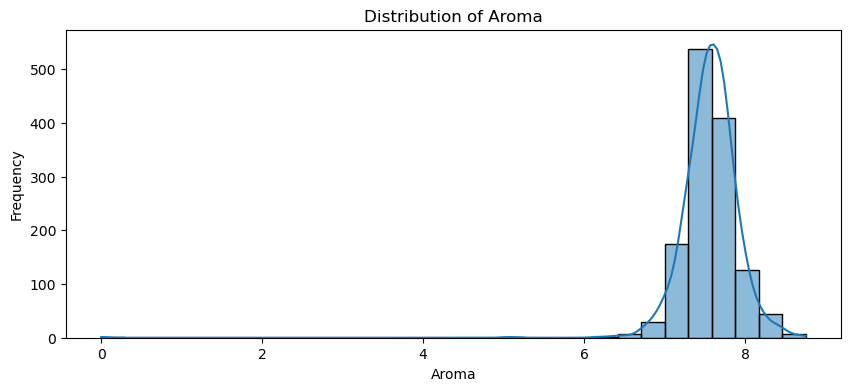

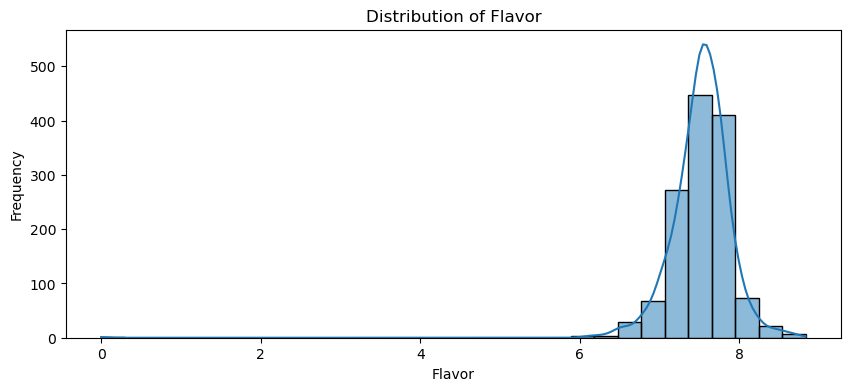

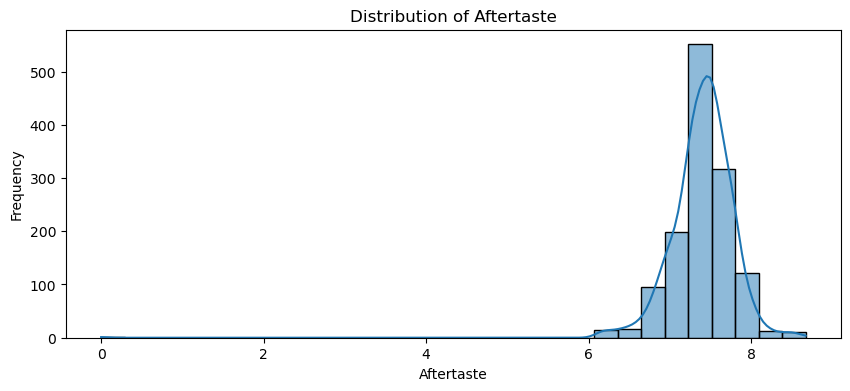

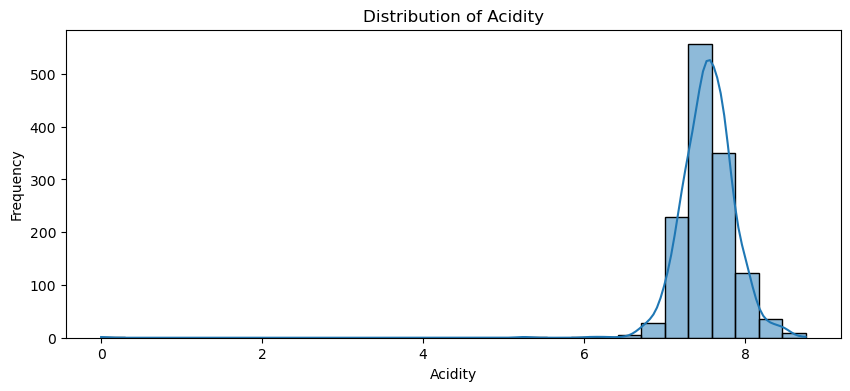

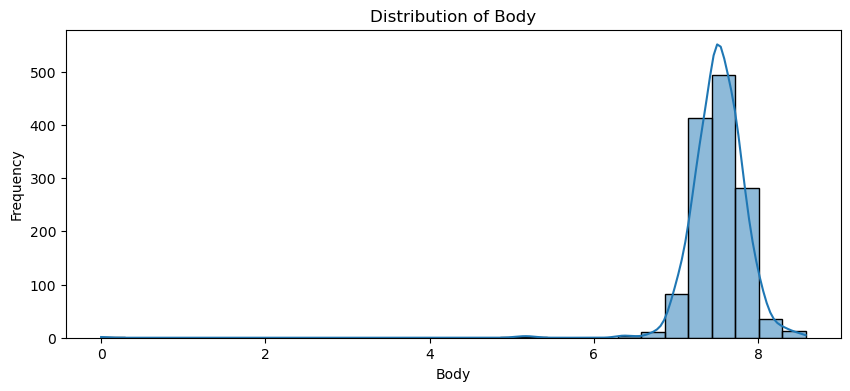

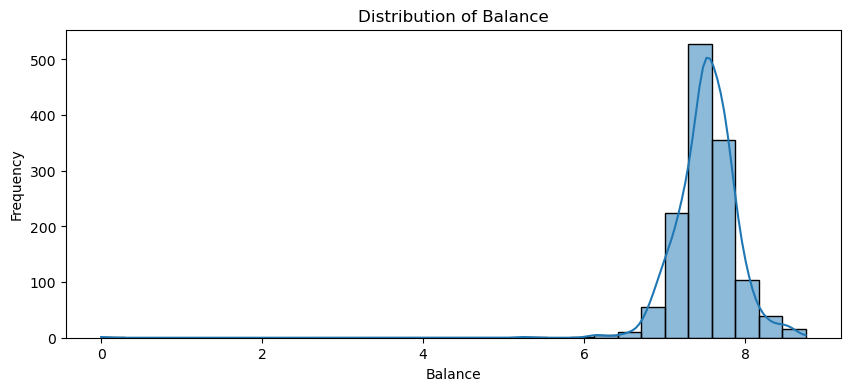

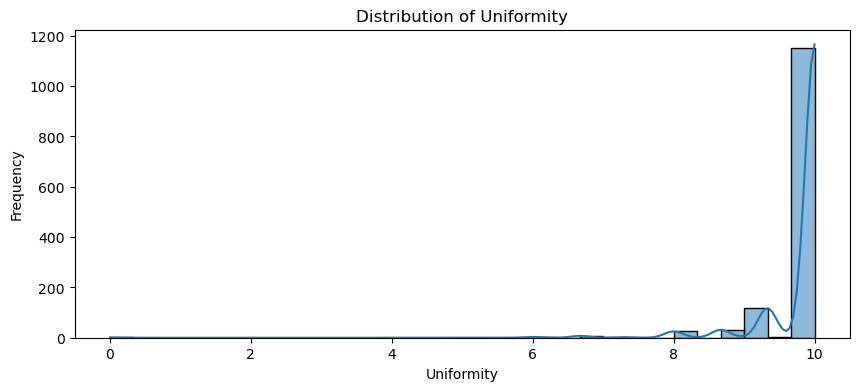

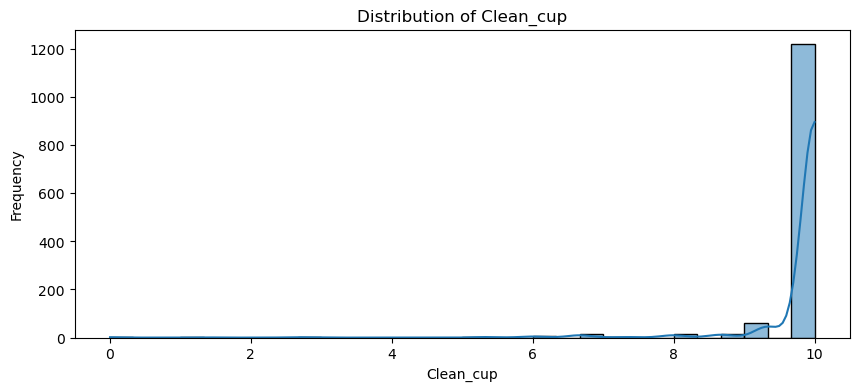

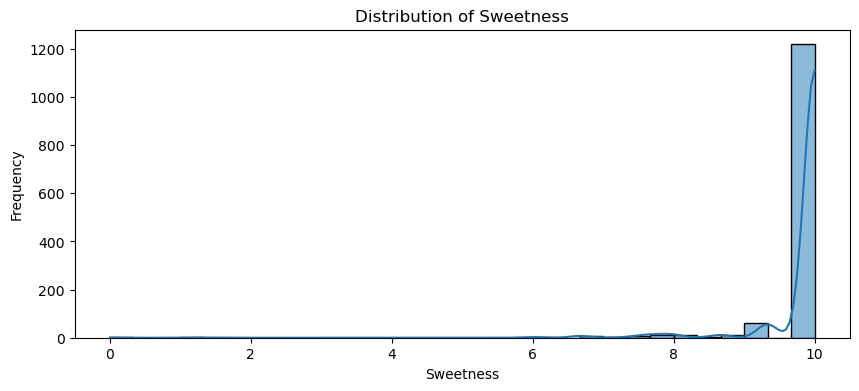

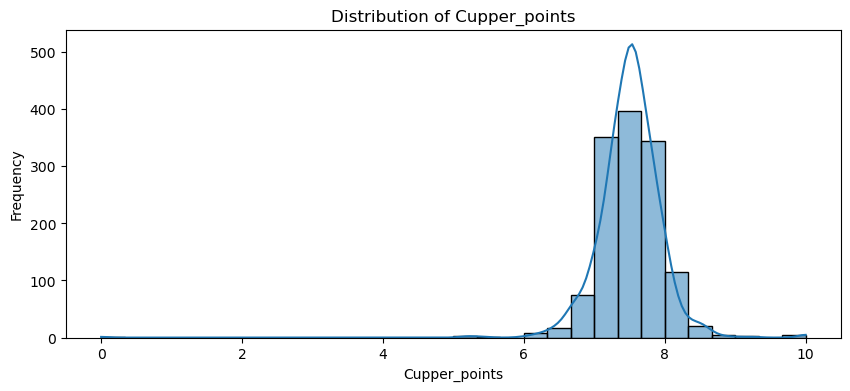

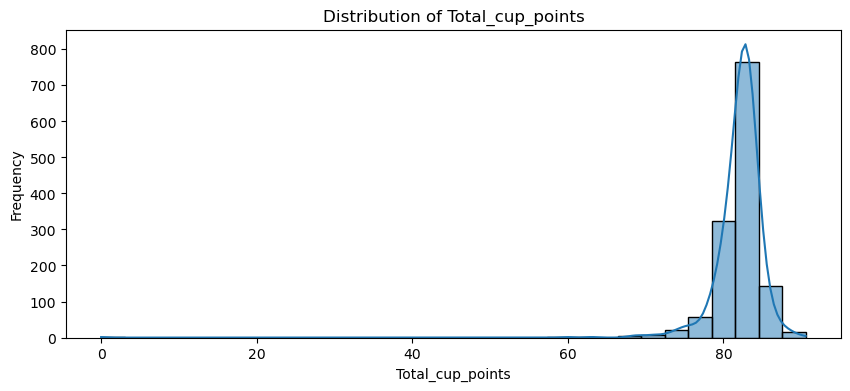

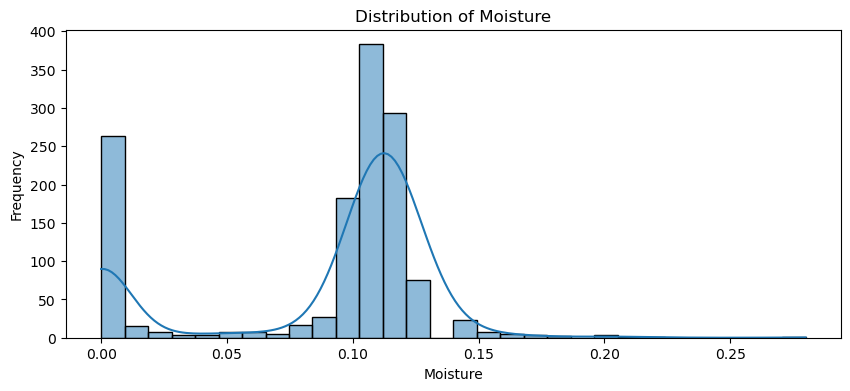

In [107]:
for col in columns_to_explore:
    plt.figure(figsize=(10, 4))
    sns.histplot(coffe_index[col], kde=True, bins=30)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.show()

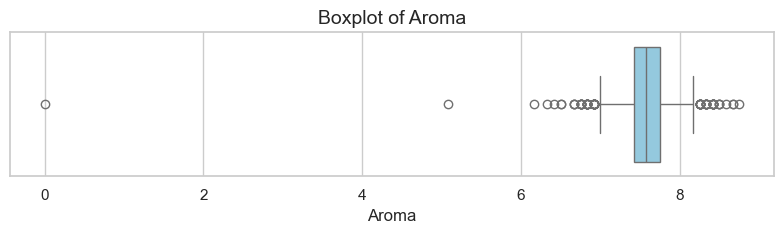

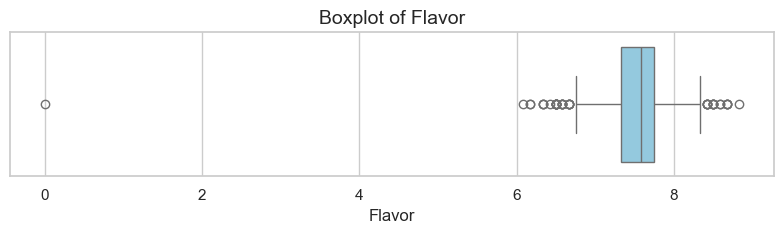

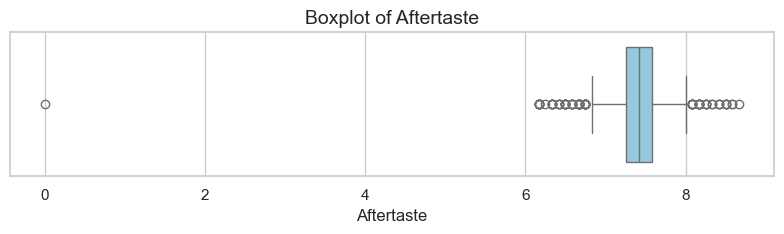

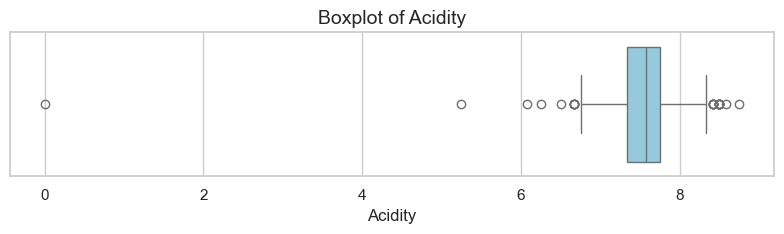

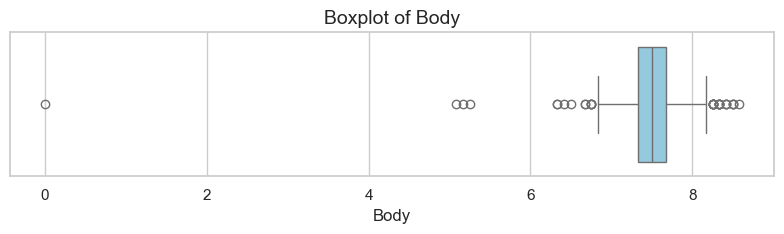

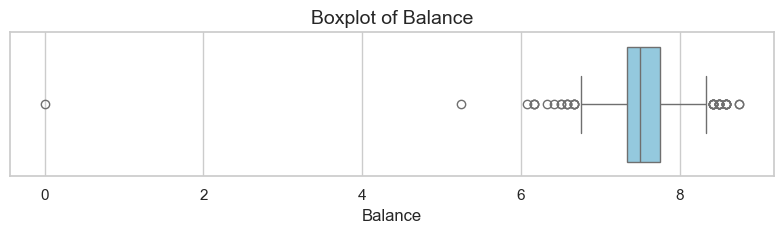

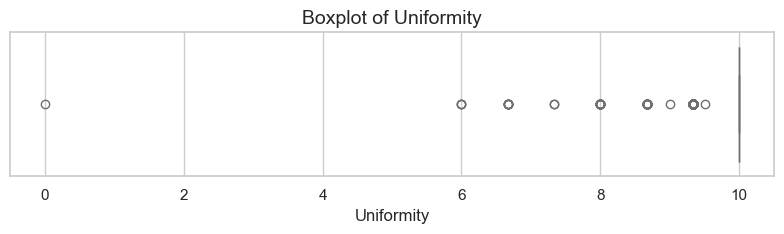

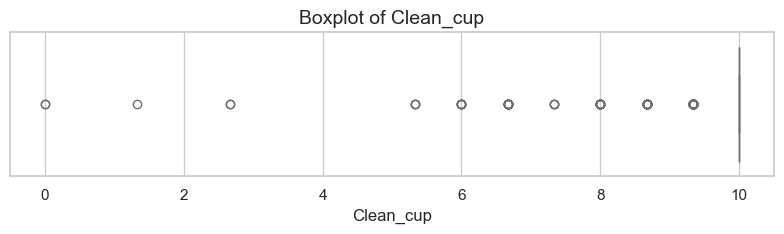

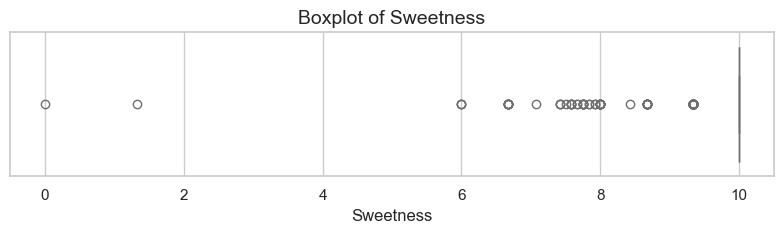

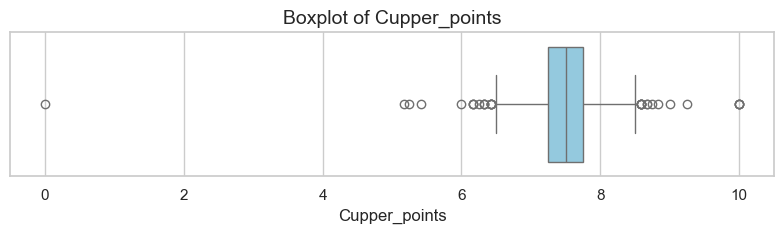

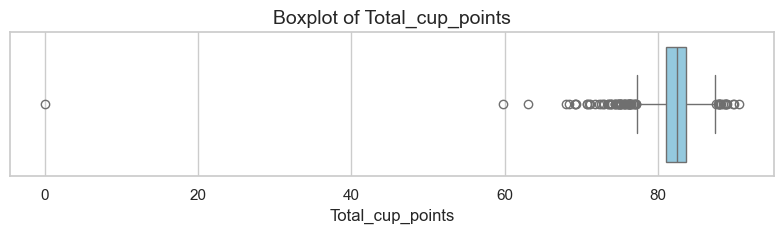

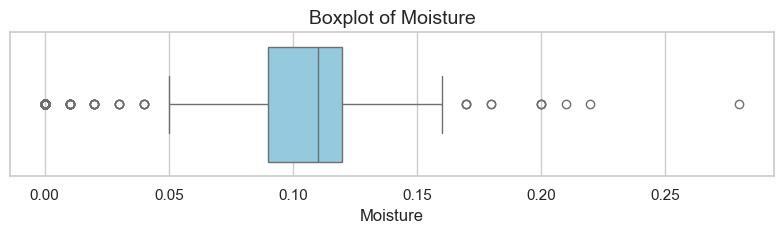

In [108]:
sns.set(style="whitegrid")

for col in columns_to_explore:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=coffe_index[col], color="skyblue")
    plt.title(f'Boxplot of {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.tight_layout()
    plt.show()

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [110]:
coffe_index.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'bag_weight_num', 'bag_weight_unit', 'bag_weight_kg',
       'harvest_year_clean', 'expiration_clean', 'granding_date_clean',
       'owner_clean', 'owner_1_clean', 'compare', 'producer_clean', 'relation',
       'continents'],
      dtype='object')

In [111]:
coffe_index.region.value_counts().unique

<bound method Series.unique of region
huila                                                                      112
oriente                                                                     80
south of minas                                                              68
kona                                                                        66
veracruz                                                                    35
                                                                          ... 
phahi                                                                        1
mahuixtlan                                                                   1
52 narino (exact location: mattituy; municipal region: florida code 381      1
aceh                                                                         1
kwanza norte province, angola                                                1
Name: count, Length: 356, dtype: int64>

In [112]:
print(coffe_index['region'].value_counts().to_dict())

{'huila': 112, 'oriente': 80, 'south of minas': 68, 'kona': 66, 'veracruz': 35, 'tarrazu': 19, 'comayagua': 17, 'huehuetenango': 16, 'san marcos': 16, 'antigua': 15, 'marcala': 15, 'thailand': 14, 'coatepec': 14, 'yunnan': 13, 'chiapas': 13, 'cauca': 13, 'jinotega': 13, 'la concordia': 12, 'zaragoza itundujia': 12, 'santander': 12, 'cerrado': 12, 'dongshan dist., tainan city 臺南市東山區': 11, 'cundinamarca': 11, 'la concordia, chiapas': 11, 'sidamo': 11, 'santa rosa': 10, 'chikmagalur': 9, 'antioquia': 9, 'nyeri': 9, 'oromia': 9, 'nuevo oriente': 9, 'eastern': 9, 'jalapa': 9, 'apaneca': 9, 'monte carmelo': 8, 'central valley': 8, 'mzuzu': 8, 'nantou': 7, 'natou county': 7, 'grama valley': 6, 'arusha': 6, 'taichung xinshe 台中市新社區': 6, 'tapachula': 6, 'yirgacheffe': 6, 'changhua baguashan 彰化市八卦山': 6, 'xalapa': 5, 'mbinga': 5, 'pitalito': 5, 'vale da grama': 5, 'la plata': 5, 'occidental': 5, 'chiangrai': 4, 'intibuca': 4, 'oaxaca': 4, 'central kenya': 4, 'san ramon': 4, 'mantiqueira de minas':

In [113]:
coffe_index.company

0           metad agricultural developmet plc
1           metad agricultural developmet plc
2                                         NaN
3       yidnekachew debessa coffee plantation
4           metad agricultural developmet plc
                        ...                  
1334                                robustasa
1335                                robustasa
1336                  global opportunity fund
1337                            cafe politico
1338                            cafe politico
Name: company, Length: 1339, dtype: object

In [114]:
region_country_counts = coffe_index.groupby(['region', 'country_of_origin']).size().reset_index(name='count')

In [115]:
region_country_counts_new = coffe_index.groupby('region')['country_of_origin'].nunique().reset_index()


In [116]:
suspicious_regions = region_country_counts[region_country_counts['num_countries'] > 1]
print(suspicious_regions)

KeyError: 'num_countries'

In [ ]:
sns.boxplot(data=coffe_index, x='country_of_origin', y='altitude_mean_meters')
plt.xticks(rotation=90)
plt.title("Altitude by Country")
plt.show()

In [ ]:
region_country_counts.iloc[80:100]

In [ ]:
company_country = coffe_index.groupby(['company', 'country_of_origin']).size().reset_index(name='count')
company_country = company_country[company_country['count'] > 0]
suspicious = company_country.groupby('company')['country_of_origin'].nunique().reset_index()
suspicious = suspicious[suspicious['country_of_origin'] > 1]

In [ ]:
coffe_index[coffe_index['company'].isin(suspicious['company'])].iloc[0:20]


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!

In [ ]:
pd.set_option('display.max_columns', None)